In [2]:
PATH = '/Users/jim'
import sys
sys.path.append(PATH)

import meteocpy as mpy
from meteocpy.forward import apex
from meteocpy.utils import load_params, BiDict

import numpy as np
import torch

import os
import matplotlib.pyplot as plt

In [278]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [301]:
from importlib import reload
reload(apex)
reload(mpy.utils)

<module 'meteocpy.utils' from '/Users/jim/meteocpy/utils.py'>

In [ ]:
#ap = apex.load_apex(binned_vnir_swir='/Users/jim/meteoc/params/binned', binned_meta='/Users/jim/meteoc/params/meta', vnir_it=27000, swir_it=15000)
ap = apex.load_apex(unbinned_vnir='/Users/jim/meteoc/params/unbinned', binned_vnir_swir='/Users/jim/meteoc/params/binned', 
                    binned_meta='/Users/jim/meteoc/params/binned_meta', vnir_it=27000, swir_it=15000)

ap.initialize_srfs([500, 2000], abs_res=0.1, srf_support_in_sigma=3, zero_out=True, do_bin=True)

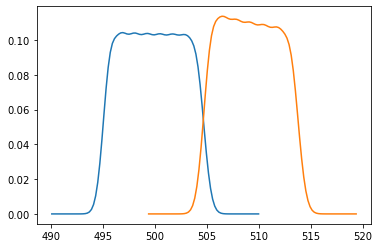

In [304]:
%matplotlib inline
_ = plt.plot(np.array(ap.model.binned.wvls[:, 500]).transpose(), 
             np.array(ap.model.binned.srfs[0, :, 500]).transpose())
#plt.figure()
#_ = plt.plot(np.array(ap.model.unbinned.wvls[:, 500]).transpose(), 
#             np.array(ap.model.unbinned.srfs[0, :, 500]).transpose())

In [310]:
res, illu_bands = ap.forward(inp_spectrum=np.array([1000000]).reshape(1, 1, -1), 
                             inp_wvlens=np.arange(500, 501, 1).reshape(1, 1), pad=False, part_covered=True,
                             invert=True, snr=False, dc=False, smear=False, return_binned=False)

In [311]:
res[0][0][:, 500]

array([6.12577300e+03, 3.32319554e-09])

In [312]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_frame(ind, channel=0, vmax=None, vmin=None, figsize=None, binned='binned'):
    tostr = lambda f: "%.2f" % f
    wvls = list(map(tostr, ap.params[binned].cw[illu_bands[ind]].mean(axis=1)))
    
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    
    im = axs[0].matshow(res[ind][channel], aspect='auto', vmax=vmax, vmin=vmin)
    axs[0].set_yticklabels([''] + wvls)
    
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes('right', size='1%', pad=0.05)
    plt.gcf().colorbar(im, cax=cax)
    
    axs[1].plot(wvls, res[ind][channel][:, [250, 500, 750]], '-o')
    axs[1].set_ylim([np.min(res[ind][channel][:, [250, 500, 750]]) * 0.9, np.max(res[ind][channel][:, [250, 500, 750]]) * 1.1])

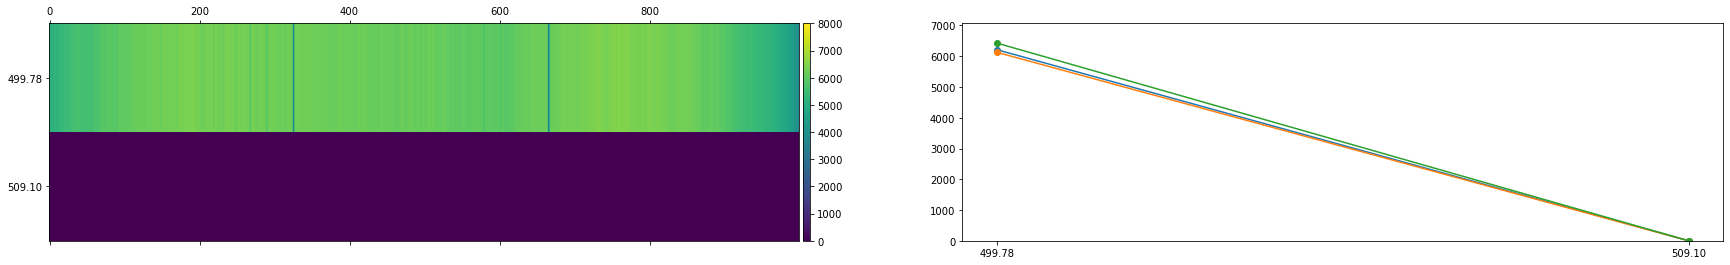

In [313]:
%matplotlib inline
inds = [0]
channel = 0
for ind in inds:
    plot_frame(ind, channel=channel, vmax=8000, vmin=None, figsize=(30, 4), binned='binned')

In [98]:
ap.bins.inverse

{0: [0],
 1: [1],
 2: [2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 3: [25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 4: [49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75],
 5: [76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97],
 6: [98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116],
 7: [117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131],
 8: [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144],
 9: [145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155],
 10: [156, 157, 158, 1

In [346]:
ap.bin_bands(ap.unbinn)

369.16421706295154

In [42]:
ap.srfs[0, ap.shift_bands_to_local(ap.srf_bands)].shape

(68, 1000, 101)

In [43]:
ap.binning_pattern[ap.srf_bands]

array([ 2,  1, 23, 24, 27, 22, 19, 15, 13, 11,  9,  9,  8,  8,  7,  6,  5,
        5,  4,  4,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

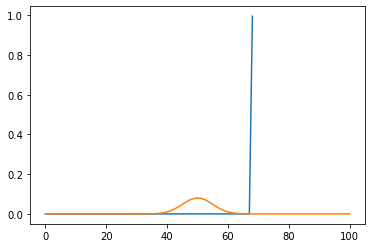

In [49]:
plt.plot(a[0, 14, 500, :])
plt.plot(ap.srfs[0, 7, 500, :])                               

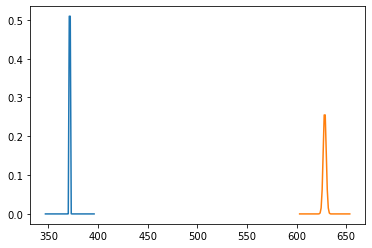

In [266]:
plt.plot(ap.wvls[1, 500, :], ap.srfs[0, 1, 500, :] / np.sum(ap.srfs[0, 1, 500, :]) / (ap.wvls[1, 500, -1] - ap.wvls[1, 500, 0]) * ap.srfs.shape[-1])
plt.plot(ap.wvls[39, 500, :], ap.srfs[0, 39, 500, :] / np.sum(ap.srfs[0, 39, 500, :]) / (ap.wvls[39, 500, -1] - ap.wvls[39, 500, 0]) * ap.srfs.shape[-1])
                                                              

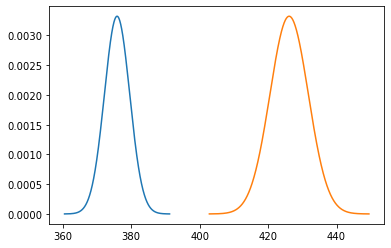

In [277]:
plt.plot(ap.wvls[2, 500, :], ap.srfs[0, 2, 500, :]/ np.sum(ap.srfs[0, 2, 500, :]))
plt.plot(ap.wvls[6, 500, :], ap.srfs[0, 6, 500, :] / np.sum(ap.srfs[0, 6, 500, :]))
                                                              

In [51]:
sum(ap.binning_pattern)

338

In [62]:
ap.rad_coeffs['gain'].shape

(316, 1000)